In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from sklearn.neighbors import KernelDensity

## Index

1. Histograma
2. Distribució discreta
3. Distribució continua
4. Model generatiu

## Histograma

L'histograma és la representació més comuna d'una distribució, ja que gràcies a aquesta, podem veure un gràfic que mostra la freqüència de cada valor.

> Per entendre millor l'exemple d'histograma, he realitzat un petit "dataset" amb valors que van del 0 al 10 que representen una tenda on es venen espelmes d'aniversari.

In [145]:
dataset = np.absolute(np.round(np.random.normal(loc=5, scale=2, size=(1000))))
dataset[dataset > 10] = 10 ## virgueria

Per representar millor el concepte d'histograma de freqüencies, a continuació explicare com funciona.

(0.0, 200.0)

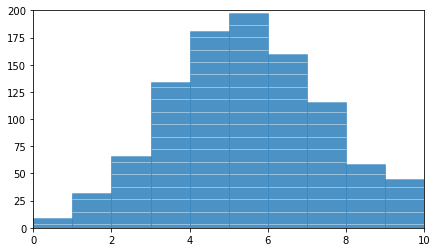

In [47]:
fig, ax = plt.subplots(1, figsize=(7,4))
bins = 10

for count, edge in zip(*np.histogram(dataset, bins)):
    for i in range(count):
        ax.add_patch(plt.Rectangle([edge, i], 1, 1, color="#3182bd", alpha=0.5))
        
ax.set_xlim(0, 10)
ax.set_ylim(0, 200)

El que estem fent és que per cada valor del dataset, mirem en quina "cistella" pertany, i quan ja sabem la "cistella" el que fem és agregar un quadrat. I aquest mecanisme l'apliquem per cada valor de l'array. L'histograma és la representació més comuna d'una distribució, ja que gràcies a aquesta, podem veure un gràfic que mostra la freqüència de cada valor.

Una vegada entes el concepte, ja podem realitzar l'histograma de freqüencies amb numpy de la següent manera:

Text(0.5, 0, "Espelmes d'aniversari")

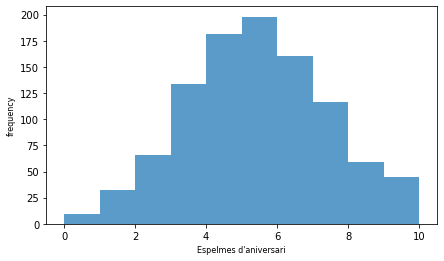

In [48]:
fig, ax = plt.subplots(1, figsize=(7, 4))
histo = ax.hist(dataset, bins=10, color = "#3182bd", alpha = 0.8)
ax.set_ylabel('frequency', fontsize = 8)
ax.set_xlabel("Espelmes d'aniversari" , fontsize = 8)

Una vegada aclarit el concepte d'histograma, hi ha dues situacions que es donen a l'hora de realitzar un histograma, que depenen de si les variables són contínues o discretes.
Si són discretes, podrem dur a terme una distribució discreta i si són contínues, doncs una distribució continua.

## Distribució discreta 
Una distribució discreta descriu la probabilitat d'ocurrència de cada valor d'una variable aleatòria discreta. Una variable aleatòria discreta és una variable aleatòria que té valors comptables, com ara una llista d'enters no negatius.
Amb una distribució de probabilitat discreta, cada valor possible de la variable aleatòria discreta pot estar associat amb una probabilitat diferent de zero.

A partir d'aquí, explicarem aquest apartat amb l'exemple de la fabirca d'espelmes de dalt.

### PDF

La funció de densitat de probabilitat ens ajuda a identificar regions de majors i menors probabilitats per a valors d'una variable aleatòria.

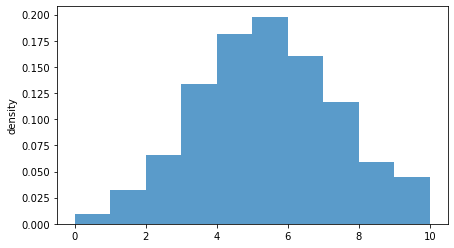

In [49]:
fig, ax = plt.subplots(1, figsize=(7, 4), sharex = True)
ax.set_ylabel('density')
v = ax.hist(dataset, bins=10, color = "#3182bd", density=True, alpha = 0.8)

En aquest cas, aquesta PDF és discreta i cada barra representa la probabilitat de cada espelma.

### CDF

Una funció de distribució acumulativa ens diu la probabilitat que una variable aleatòria prengui un valor menor o igual que x .

<AxesSubplot:ylabel='Proportion'>

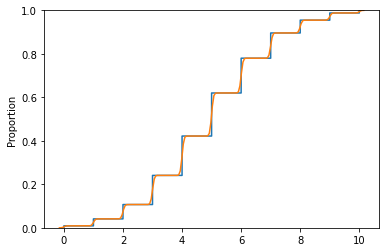

In [50]:
sns.ecdfplot(data = dataset)
sns.kdeplot(data = dataset, bw_adjust = 0.1, cumulative = True)

Si en fixem en la distribució, podem veure la que té major probabilitat de ser comprada és l'espalma número 6.

## Distribució continua

``` Combino integració per la iaia amb distribució contínua !!! ```

Una distribució contínua descriu les probabilitats dels possibles valors d'una variable aleatòria contínua. Una variable aleatòria contínua és una variable aleatòria amb un conjunt de valors possibles (conegut com el rang) que és infinit i no es pot comptar.

Les probabilitats de les variables aleatòries contínues (X) es defineixen com l'àrea per sota de la corba de la seva PDF. Per tant, només els rangs de valors poden tenir una probabilitat diferent de zero. La probabilitat que una variable aleatòria contínua equivalgui a algun valor sempre és "zero".


Per aquest exemple posarem el pes dels homes a Espanya.




In [5]:
dataset_2 = np.absolute(np.random.normal(loc=75, scale=15, size=(1000))) #Se que no es una mostra representativa xd

### Histograma 

En el cas d'una variable contínua, volem que l'histograma representi la densitat de probabilitat d'aquesta variable. En aquest cas sí que és important considerar l'ample de l'histograma, ja que per a normalitzar voldrem calcular la integral, és a dir, area×altura de cada bin.

Text(0.5, 0, 'Pes')

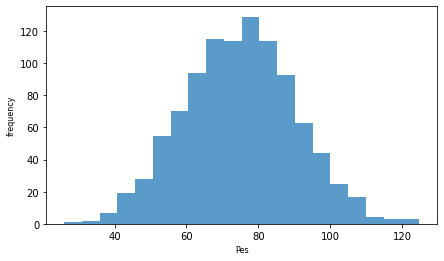

In [6]:
fig, ax = plt.subplots(1, figsize=(7, 4))
ax.hist(dataset_2, bins=20, color = "#3182bd", alpha = 0.8)
ax.set_ylabel('frequency', fontsize = 8)
ax.set_xlabel("Pes" , fontsize = 8)

### PDF

#### Distribució normal o de Gauss

La distribució de Gauss és un kernel que ens ajudarà a obtenir les probabilitats quan les variables són contínues.
Hi ha d'altres kernels, però per aquest exemple, crec que aquest és el més representatiu.


In [37]:
kde = KernelDensity(kernel = 'gaussian', bandwidth = 1.0).fit(dataset_2[:, None])

In [39]:
log_density = kde.score_samples(x[:, None])
density = np.exp(log_density)

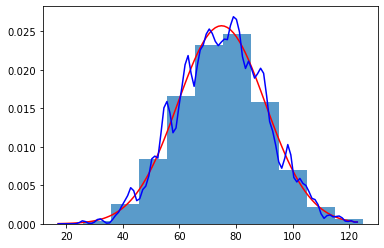

In [42]:
dist = norm(loc=np.mean(dataset_2), scale=np.std(dataset_2))
x = np.linspace(dist.ppf(0.0001), dist.ppf(0.999), 100)
y = dist.pdf(x)
plt.plot(x, y, "r-")
plt.plot(x, density, "b-") #kde gaussian
pdf = plt.hist(dataset_2, bins=10, color = "#3182bd", density=True, alpha = 0.8)

El pas següent serà pintar l'àrea sota la campana de Gauss amb un rang determinat.

0.12977313960027625


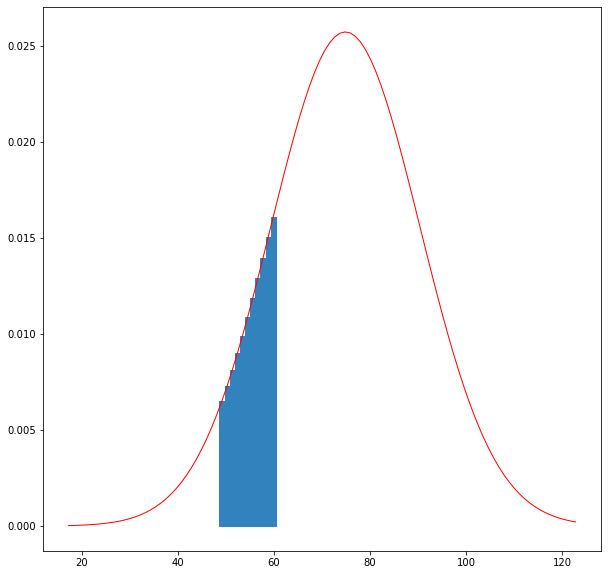

In [33]:
dx = dataset_2[2] - dataset_2[1]
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.plot(x, dist.pdf(x), "r-", lw = 1)
dx = np.diff(x)
A = 0
for i in [30,31,32,33,34,35,36,37,38,39,40] : 
    A += (x[i+1] - x[i]) * y[i]
    ax.add_patch(plt.Rectangle((x[i]-dx[i] / 2,0),dx[i],y[i], color="#3182bd"))  
print(A)

L'àrea pintada sota la campana en aquest exemple representa el rang de 50 a 60 quilos. L'àrea d'aquest rang és 0.12977313960027625, per tant, la probabilitat que un home seleccionat aleatòriament pesi entre 50 i 60 quilos és de 12.9% a Espanya.

Si pintéssim tota l'àrea per sota de la corba, equivaldria a 1,0.

### Model generatiu

Els models generatius permeten a una màquina “aprendre” els patrons que existeixen en les dades amb els quals són entrenades i a partir d'aquest aprenentatge, són capaços de generar dades similars que en alguns casos poden ser gairebé tan “reals” com els que es van utilitzar inicialment per al seu entrenament.

Mitjançant aquesta mena de models poden generar-se noves dades que tenen diferents aplicacions, entre elles, generar dades que altres sistemes d'aprenentatge podran utilitzar per al seu entrenament, sense necessitat que aquestes dades existeixin prèviament.

#### inverse sampling
El inverse sampling és un mètode per a generar números aleatoris a partir de qualsevol distribució de probabilitat (PDF) utilitzant la seva distribució acumulativa (CDF).

Aquest exemple el realitzaré amb el csv de la ruleta.

El primer pas que haurem de fer serà calcular l'histograma, pdf, i cdf

In [96]:
df = pd.read_csv('./ruleta.csv')
bins = np.arange(37)
hist = np.zeros(37)
for x in df.number: hist[x] += 1
pdf = hist /np.sum(hist) /1.0
cdf = np.insert(np.cumsum(pdf *1.0), 0, 0)

Una vegada creades, el que farem sera una mostra d'allo que tenim però amb més valors.

In [116]:
#El que estem fent és que per cada iteració de bucle és, que ens retorni l'array que
#correspon a aquell valor, i d'aquell array, agafem l'última posició.
mostra = [np.where(cdf <= x)[0][-1] for x in np.random.rand(2000)]

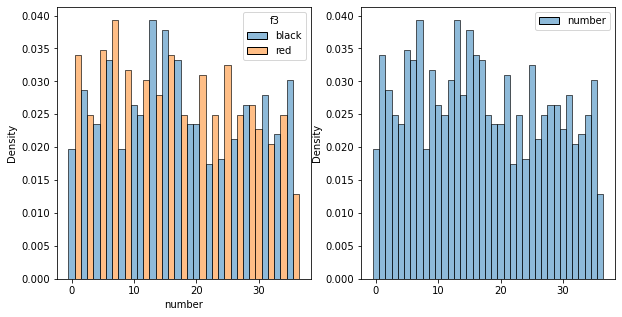

In [117]:
fig, axs = plt.subplots(1, 2, figsize = (10, 5))
sns.histplot(ax = axs[0], data = df, x = 'number', hue = 'f3', discrete = True, stat = 'density')
sns.histplot(ax = axs[1], data = df, binwidth = 1, discrete = True, stat = 'density');

Una vegada creada la mostra, ja podem fer diverses coses com per exemple jugar-hi i saber quanta rendibilitat guanyem.

In [ ]:
fitches = 100
for i in np.random.rand(1000) :
    fitches -= 2
    if np.where(cumul < i)[0][-1] < 19 :
        fitches += 2 
    if np.where(cumul < i)[0][-1] %2 == 0 :
        fitches += 2
print(fitches)

Una altra cosa que podem saber gràcies a la mostra és quins números són els que surten més vegades.
En el següent exemple podem comprovar que els valors amb més probabilitat de sortir són el 13, 7 i 15.

In [144]:
mostra = [np.where(cdf < i)[0][-1] for i in np.random.rand(100000)]
unique, counts = np.unique(mostra, return_counts=True)
zipped = list(zip(unique, counts))
res = sorted(zipped, key = lambda x: x[1])

[(36, 1259), (22, 1763), (24, 1856), (8, 1954), (0, 2013), (32, 2032), (26, 2131), (33, 2178), (30, 2248), (19, 2269), (20, 2346), (4, 2382), (23, 2473), (27, 2474), (3, 2481), (18, 2490), (11, 2502), (34, 2572), (28, 2594), (29, 2644), (10, 2726), (14, 2805), (31, 2835), (2, 2904), (12, 3030), (35, 3031), (9, 3090), (21, 3127), (25, 3227), (6, 3237), (17, 3375), (5, 3450), (1, 3481), (16, 3528), (15, 3720), (7, 3847), (13, 3926)]
